In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
from matplotlib import style
import datetime
import pandas_datareader.data as web
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import yfinance as yf
import csv

# Define the stock ticker and the date range
ticker = 'BBCA.JK'
train_start_date = '2010-01-04'
train_end_date = '2019-12-01'

test_start_date = '2020-01-02'
test_end_date = '2022-12-01'

validation_start_date = '2023-01-02'
validation_end_date = datetime.date.today()

# Get the data
train_data = yf.download(ticker, start=train_start_date, end=train_end_date)

train_data.to_csv('train_data.csv')


# Get the stock data using yahoo API:
# get 2009-2019 data to train our model
#train_data = web.DataReader('BBCA.JK', 'yahoo', datetime.datetime(2010,1,4),datetime.datetime(2019,12,1)) 

# get 2020 data to present date to test the SVM model
# test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,2), datetime.date.today()) 
test_data = yf.download(ticker, start=test_start_date, end=test_end_date)
#test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,4), datetime.datetime(2021,12,1)) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1010.0,1010.0,965.0,1010.0,800.359863,77812500
2010-01-05,1020.0,1020.0,990.0,1020.0,808.284180,44442500
2010-01-06,990.0,1020.0,990.0,990.0,784.511230,27782500
2010-01-07,995.0,995.0,965.0,995.0,788.473328,38632500
2010-01-08,970.0,995.0,970.0,970.0,768.662415,27427500
...,...,...,...,...,...,...
2019-11-25,6330.0,6335.0,6275.0,6275.0,5638.059570,55133500
2019-11-26,6330.0,6330.0,6270.0,6285.0,5647.044434,192783500
2019-11-27,6270.0,6300.0,6240.0,6300.0,5660.522949,58833500


In [5]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6695.0,6780.0,6680.0,6690.0,6029.958496,49445000
2020-01-03,6750.0,6800.0,6725.0,6800.0,6129.104492,47755500
2020-01-06,6720.0,6750.0,6690.0,6735.0,6070.518555,27300000
2020-01-07,6735.0,6770.0,6730.0,6740.0,6075.025391,45022500
2020-01-08,6670.0,6745.0,6670.0,6680.0,6020.944336,53692500
...,...,...,...,...,...,...
2022-11-24,8975.0,9000.0,8950.0,9000.0,8550.542969,53520800
2022-11-25,9000.0,9000.0,8900.0,8975.0,8526.791016,75048300
2022-11-28,9050.0,9100.0,8975.0,9025.0,8574.293945,96209700


In [6]:
# sort by date
train_data = train_data.sort_values('Date')
test_data = test_data.sort_values('Date')

# fix the date 
train_data.reset_index(inplace=True)
train_data.set_index("Date", inplace=True)
test_data.reset_index(inplace=True)
test_data.set_index("Date", inplace=True)

In [7]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1010.0,1010.0,965.0,1010.0,800.359863,77812500
2010-01-05,1020.0,1020.0,990.0,1020.0,808.284180,44442500
2010-01-06,990.0,1020.0,990.0,990.0,784.511230,27782500
2010-01-07,995.0,995.0,965.0,995.0,788.473328,38632500
2010-01-08,970.0,995.0,970.0,970.0,768.662415,27427500
...,...,...,...,...,...,...
2019-11-25,6330.0,6335.0,6275.0,6275.0,5638.059570,55133500
2019-11-26,6330.0,6330.0,6270.0,6285.0,5647.044434,192783500
2019-11-27,6270.0,6300.0,6240.0,6300.0,5660.522949,58833500


In [8]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6695.0,6780.0,6680.0,6690.0,6029.958496,49445000
2020-01-03,6750.0,6800.0,6725.0,6800.0,6129.104492,47755500
2020-01-06,6720.0,6750.0,6690.0,6735.0,6070.518555,27300000
2020-01-07,6735.0,6770.0,6730.0,6740.0,6075.025391,45022500
2020-01-08,6670.0,6745.0,6670.0,6680.0,6020.944336,53692500
...,...,...,...,...,...,...
2022-11-24,8975.0,9000.0,8950.0,9000.0,8550.542969,53520800
2022-11-25,9000.0,9000.0,8900.0,8975.0,8526.791016,75048300
2022-11-28,9050.0,9100.0,8975.0,9025.0,8574.293945,96209700


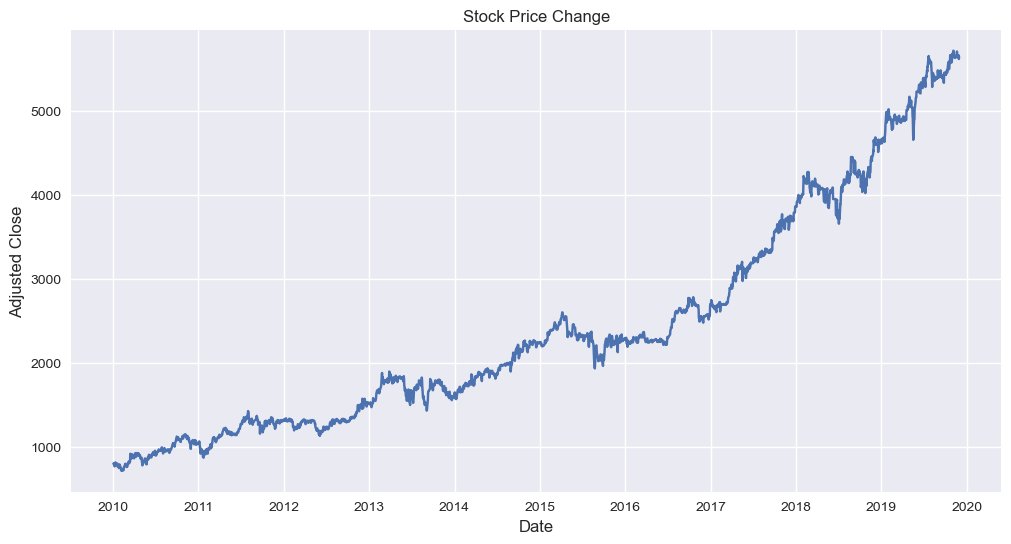

In [9]:
from matplotlib import pyplot as plt

style.use('seaborn')
plt.figure(figsize = (12,6))
plt.plot(train_data["Adj Close"])
plt.title("Stock Price Change")
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Adjusted Close", fontsize = 12)
plt.show()

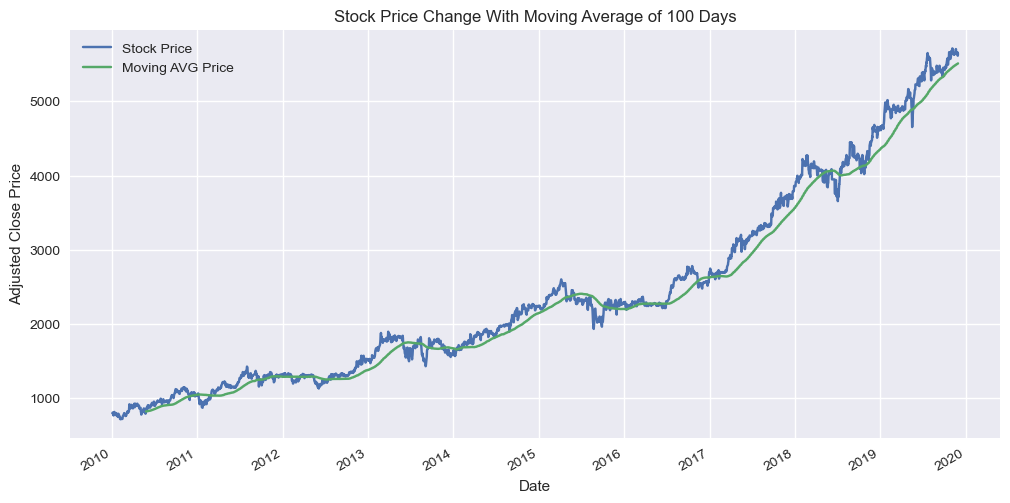

In [10]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg = close_price.rolling(window=100).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 100 Days")
close_price.plot(label='Stock Price')
moving_avg.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

In [11]:
import matplotlib.dates as mdates

# change the dates into ints for training 
indxed_dates = train_data.copy()
indxed_dates = indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
actual_dates = indxed_dates['Date']

# convert to ints
indxed_dates['Date'] = indxed_dates['Date'].map(mdates.date2num)

indxed_dates

,Date,Open,High,Low,Close,Adj Close,Volume
0,14613.0,1010.0,1010.0,965.0,1010.0,800.359863,77812500
1,14614.0,1020.0,1020.0,990.0,1020.0,808.284180,44442500
2,14615.0,990.0,1020.0,990.0,990.0,784.511230,27782500
3,14616.0,995.0,995.0,965.0,995.0,788.473328,38632500
4,14617.0,970.0,995.0,970.0,970.0,768.662415,27427500
...,...,...,...,...,...,...,...
2466,18225.0,6330.0,6335.0,6275.0,6275.0,5638.059570,55133500
2467,18226.0,6330.0,6330.0,6270.0,6285.0,5647.044434,192783500
2468,18227.0,6270.0,6300.0,6240.0,6300.0,5660.522949,58833500
2469,18228.0,6295.0,6295.0,6245.0,6250.0,5615.598633,44248000


In [12]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates_data = indxed_dates['Date'].to_numpy()
prices_data = train_data['Adj Close'].to_numpy()

#Convert to 1d Vector
dates_data = np.reshape(dates_data, (len(dates_data), 1))
prices_data = np.reshape(prices_data, (len(prices_data), 1))

In [13]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1e4))
SVR_linear.fit(dates_data, prices_data)
SVR_linear_train = SVR_linear.predict(dates_data)

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
SVR_linear_train

array([ 482.89985202,  483.91860712,  484.93736221, ..., 4164.68078003,
       4165.69953514, 4166.71829022])

In [15]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e4, gamma= 0.1)
SVR_rbfk.fit(dates_data, prices_data)
SVR_rbfk_train = SVR_rbfk.predict(dates_data)

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
SVR_rbfk_train

array([ 800.46005746,  799.10422121,  798.60054611, ..., 5660.42342574,
       5680.46342022, 5642.45319113])

In [17]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=3, epsilon=0.1, coef0=1))
SVR_poly.fit(dates_data, prices_data)
SVR_poly_train = SVR_poly.predict(dates_data)

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
SVR_poly_train

array([ 734.63930086,  735.76139351,  736.88235571, ..., 5794.82011673,
       5798.82127431, 5802.82515669])

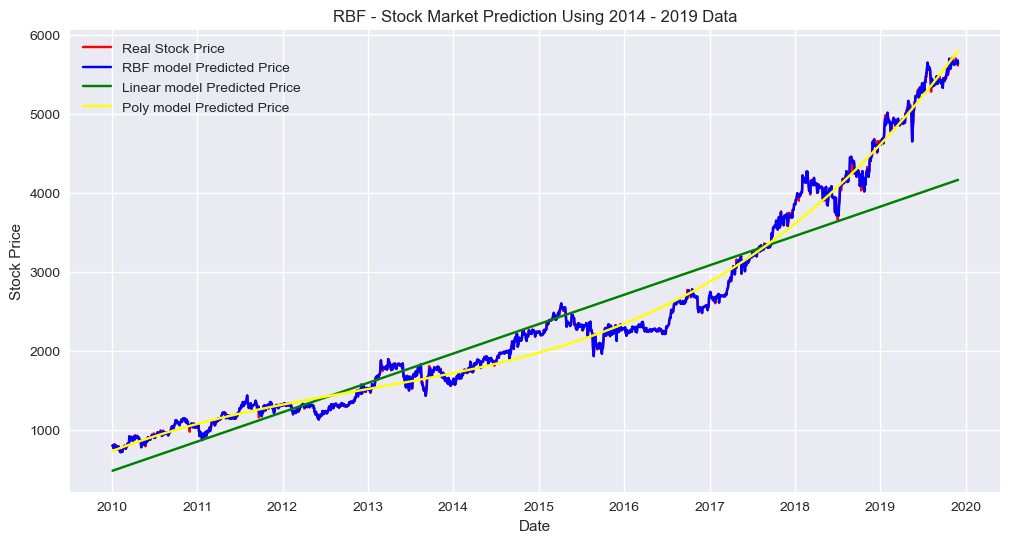

In [19]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2014 - 2019 Data')
plt.plot(dates_data, prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(actual_dates, SVR_rbfk_train, color= 'blue', label= 'RBF model Predicted Price') 
plt.plot(actual_dates, SVR_linear_train, color= 'green', label= 'Linear model Predicted Price') 
plt.plot(actual_dates, SVR_poly_train, color= 'yellow', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [20]:
# change the dates into ints for training 
test_indxed_dates = test_data.copy()
test_indxed_dates = test_indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
test_actual_dates = test_indxed_dates['Date']

# convert to ints
test_indxed_dates['Date'] = test_indxed_dates['Date'].map(mdates.date2num)

In [21]:
test_indxed_dates

,Date,Open,High,Low,Close,Adj Close,Volume
0,18263.0,6695.0,6780.0,6680.0,6690.0,6029.958496,49445000
1,18264.0,6750.0,6800.0,6725.0,6800.0,6129.104492,47755500
2,18267.0,6720.0,6750.0,6690.0,6735.0,6070.518555,27300000
3,18268.0,6735.0,6770.0,6730.0,6740.0,6075.025391,45022500
4,18269.0,6670.0,6745.0,6670.0,6680.0,6020.944336,53692500
...,...,...,...,...,...,...,...
708,19320.0,8975.0,9000.0,8950.0,9000.0,8550.542969,53520800
709,19321.0,9000.0,9000.0,8900.0,8975.0,8526.791016,75048300
710,19324.0,9050.0,9100.0,8975.0,9025.0,8574.293945,96209700
711,19325.0,8975.0,9075.0,8925.0,8975.0,8526.791016,91562100


In [22]:
test_dates_data = test_indxed_dates['Date'].to_numpy()
test_prices_data = test_data['Adj Close'].to_numpy()

#Convert to 1d Vector
test_dates_data = np.reshape(test_dates_data, (len(test_dates_data), 1))
test_prices_data = np.reshape(test_prices_data, (len(test_prices_data), 1))

In [23]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e4, gamma= 0.1)
SVR_rbfk.fit(test_dates_data, test_prices_data)
SVR_rbfk_test = SVR_rbfk.predict(test_dates_data)
SVR_rbfk_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6030.05865526, 6129.00454218, 6070.61879768, 6058.60103667,
       6064.92814711, 6074.92561579, 6061.60497588, 6079.6318123 ,
       6143.79683875, 6166.9405413 , 6174.07256685, 6196.80565864,
       6160.55084914, 6156.04564309, 6165.25768551, 6151.27228092,
       6138.21844053, 6165.05859545, 6123.66020109, 6115.68464786,
       6042.79718011, 5840.77664537, 5804.5234553 , 5971.2401803 ,
       6055.18588241, 6075.12520398, 6092.95221727, 6115.48413843,
       6110.97837348, 6129.20469245, 6103.51315368, 6021.04445427,
       6056.89797114, 6034.56457029, 5987.54643881, 5974.00542708,
       5962.25776812, 5881.33696539, 5869.91337282, 5786.6961401 ,
       5706.99329933, 5669.32220562, 5480.24145247, 5638.96256688,
       5804.72282094, 5800.21659322, 5588.20131608, 5214.34706522,
       5340.33314689, 5272.73296451, 5071.89860817, 5011.345224  ,
       5011.34554606, 4614.95493936, 4288.1641397 , 4195.53789335,
       4267.74026479, 3993.03113873, 4056.12535472, 4758.97032

In [24]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1))
SVR_linear.fit(test_dates_data, test_prices_data)
SVR_linear_test =  SVR_linear.predict(test_dates_data)
SVR_linear_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5754.63498199, 5755.88305463, 5759.62727254, 5760.87534518,
       5762.12341781, 5763.37149045, 5764.61956309, 5768.363781  ,
       5769.61185364, 5770.85992628, 5772.10799891, 5773.35607155,
       5777.10028946, 5778.3483621 , 5779.59643474, 5780.84450738,
       5782.09258001, 5785.83679793, 5787.08487056, 5788.3329432 ,
       5789.58101584, 5790.82908848, 5794.57330639, 5795.82137903,
       5797.06945166, 5798.3175243 , 5799.56559694, 5803.30981485,
       5804.55788749, 5805.80596013, 5807.05403276, 5808.3021054 ,
       5812.04632331, 5813.29439595, 5814.54246859, 5815.79054123,
       5817.03861386, 5820.78283178, 5822.03090441, 5823.27897705,
       5824.52704969, 5825.77512233, 5829.51934024, 5830.76741288,
       5832.01548551, 5833.26355815, 5834.51163079, 5838.2558487 ,
       5839.50392134, 5840.75199398, 5842.00006661, 5843.24813925,
       5846.99235716, 5848.2404298 , 5849.48850244, 5850.73657508,
       5851.98464771, 5855.72886563, 5856.97693827, 5859.47308

In [25]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=4, epsilon=0.1, coef0=1))
SVR_poly.fit(test_dates_data, test_prices_data)
SVR_poly_test = SVR_poly.predict(test_dates_data)
SVR_poly_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6139.64487388, 6129.13053083, 6098.08089262, 6087.89446145,
       6077.78924802, 6067.76494928, 6057.82126272, 6028.47085888,
       6018.84660646, 6009.30146157, 5999.83512487, 5990.44729755,
       5962.75189151, 5953.67512405, 5944.67537978, 5935.75236307,
       5926.90577879, 5900.8216772 , 5892.27788196, 5883.80905146,
       5875.41489375, 5867.09511739, 5842.57917008, 5834.55401543,
       5826.60179291, 5818.72221427, 5810.91499178, 5787.92459178,
       5780.40392712, 5772.95418786, 5765.57508944, 5758.26634783,
       5736.75943139, 5729.7292872 , 5722.76808755, 5715.87555157,
       5709.05139892, 5688.98644547, 5682.4330333 , 5675.94661067,
       5669.5269004 , 5663.17362587, 5644.50965806, 5638.41937051,
       5632.39414338, 5626.43370319, 5620.53777697, 5603.23436064,
       5597.59377141, 5592.01633933, 5586.50179461, 5581.04986801,
       5565.0671122 , 5559.86297603, 5554.72011962, 5549.63827686,
       5544.61718221, 5529.91573918, 5525.13499188, 5515.75151

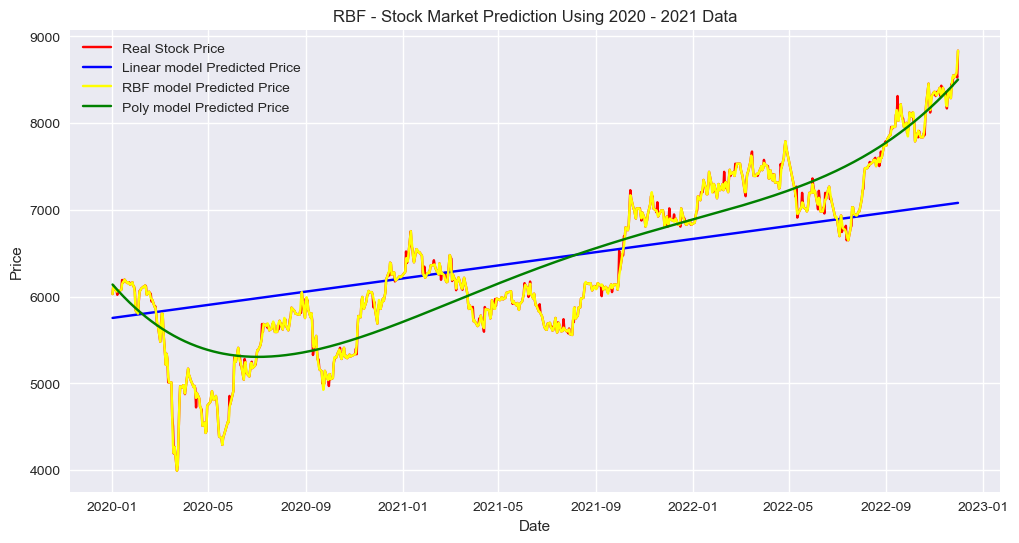

In [26]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2020 - 2021 Data')
plt.plot(test_dates_data, test_prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(test_actual_dates, SVR_linear_test, color= 'blue', label= 'Linear model Predicted Price')
plt.plot(test_actual_dates, SVR_rbfk_test, color= 'yellow', label= 'RBF model Predicted Price')
plt.plot(test_actual_dates, SVR_poly_test, color= 'green', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("SVR RBF Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_rbfk_train)))

print("SVR RBF Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_rbfk_train))

print("SVR RBF Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_rbfk_train))

print("SVR RBF Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_rbfk_test)))

print("SVR RBF Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_rbfk_test))

print("SVR RBF Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_rbfk_test))


SVR RBF Train RMSE: 12.00
SVR RBF Train R2 Score: 1.00
SVR RBF Train MAE Score: 3.94
SVR RBF Test RMSE: 38.71
SVR RBF Test R2 Score: 1.00
SVR RBF Test MAE Score: 15.34


In [28]:
print("SVR Linear Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_linear_train)))

print("SVR Linear Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_linear_train))

print("SVR Linear Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_linear_train))

print("SVR Linear Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_linear_test)))

print("SVR Linear Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_linear_test))

print("SVR Linear Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_linear_test))

SVR Linear Train RMSE: 486.32
SVR Linear Train R2 Score: 0.86
SVR Linear Train MAE Score: 352.54
SVR Linear Test RMSE: 651.45
SVR Linear Test R2 Score: 0.54
SVR Linear Test MAE Score: 538.09


In [29]:
print("SVR Poly Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_poly_train)))

print("SVR Poly Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_poly_train))

print("SVR Poly Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_poly_train))

print("SVR Poly Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_poly_test)))

print("SVR Poly Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_poly_test))

print("SVR Poly Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_poly_test))

SVR Poly Train RMSE: 161.60
SVR Poly Train R2 Score: 0.99
SVR Poly Train MAE Score: 122.26
SVR Poly Test RMSE: 413.84
SVR Poly Test R2 Score: 0.81
SVR Poly Test MAE Score: 337.79
